In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import sqlalchemy
import matplotlib.pyplot as plt
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
Measurement
Station

sqlalchemy.ext.automap.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
#Data values for measurement table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
#Data values for station table
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [14]:
# Find the most recent date in the data set.
Recent_Date = (session.query(Measurement.date)
                     .order_by(Measurement.date.desc())
                     .first())
Recent_Date

('2017-08-23',)

In [15]:
#extract string from query object
Recent_Date = list(np.ravel(Recent_Date))[0]
#convert date string to datetime object
Recent_Date = dt.datetime.strptime(Recent_Date, '%Y-%m-%d')
Recent_Date

datetime.datetime(2017, 8, 23, 0, 0)

In [16]:
# Date 12 months from the latest date
date_from_12months = Recent_Date - dt.timedelta(days=365)
date_from_12months

datetime.datetime(2016, 8, 23, 0, 0)

In [17]:
# Perform a query to retrieve the data and precipitation scores

Result= session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= date_from_12months).\
    group_by(Measurement.date).all()

Result

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(Result,columns=['Date','Precipitation'])
df.set_index('Date', inplace = True)
df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [26]:
# Sort the dataframe by date
df = df.sort_values(by='Date')
df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


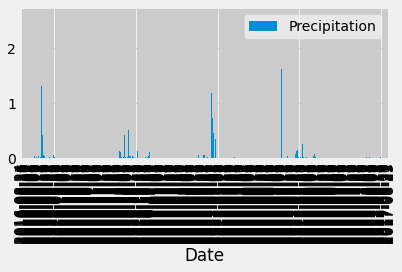

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(Result,columns=['Date','Precipitation'])
df.set_index('Date', inplace = True)
df.plot.bar()
plt.tight_layout()
plt.show()

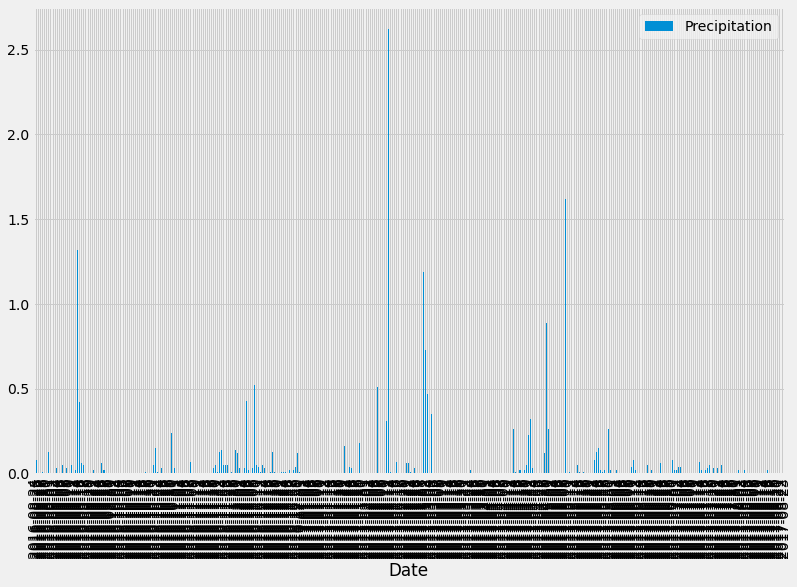

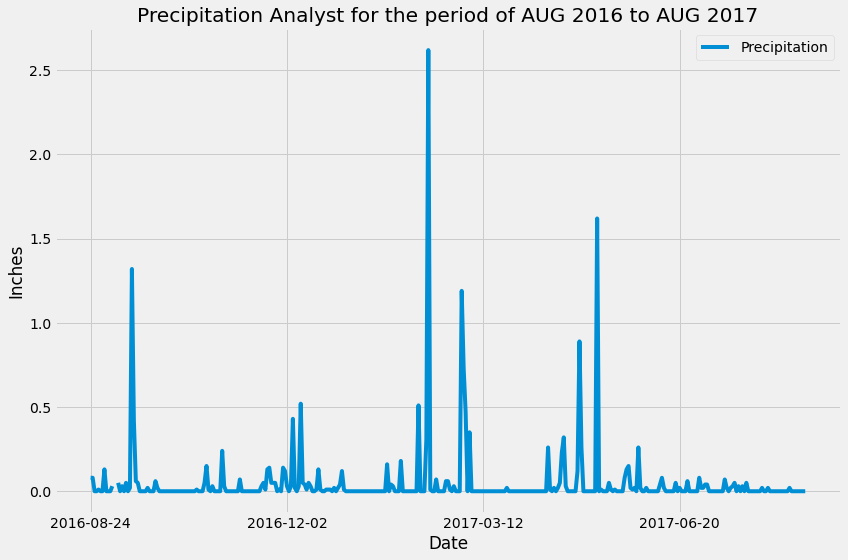

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind="bar",figsize=(12,8))

A= df.plot(figsize=(12,8))
plt.locator_params(axis='x', nbins=7)


plt.legend()

plt.title("Precipitation Analyst for the period of AUG 2016 to AUG 2017")
plt.ylabel("Inches")
plt.xlabel("Date")

plt.tight_layout()
plt.show()

# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset
stationsCount = session.query(Station).count()
print(f"Station Count: {stationsCount}")

Station Count: 9


In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Count_by_Station = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
Count_by_Station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#set the most active station
Best_station = Count_by_Station[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == Best_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temp_result = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == Best_station).\
                filter(Measurement.date >= date_from_12months).all()

Temp_result_df= pd.DataFrame(Temp_result, columns=['station','tobs'])
Temp_result_df.set_index('station', inplace=True)
Temp_result_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


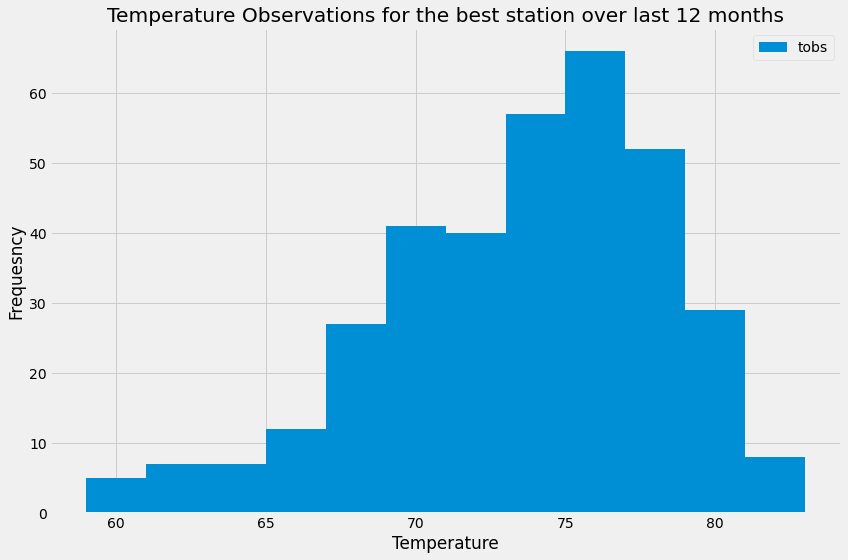

In [30]:
# Plot the results as a histogram with bins=12.
Temp_result_df.plot.hist(by='station', bins=12, figsize=(12,8))


plt.title("Temperature Observations for the best station over last 12 months")
plt.xlabel("Temperature")
plt.ylabel("Frequesncy")

plt.savefig("../StationTemps.png")

plt.legend()
plt.tight_layout()
plt.show()

# Close session

In [31]:
# Close Session
session.close()